# Оптимизация, глобальная оптимизация, и оптимизация негладкой функции
## Цели: 
- научится применять библиотеку SciPy для минимизации функций
- научится делать выбор между градиентными и неградиентными методами оптимизации, исходя из особенностей задачи и пожеланий к итоговому решению



## Задание 1: Минимизация гладкой функции
> Необходимо найти минимум функции f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2),  на промежутке [1, 30]  с помощью scipy.optimize. 

## Выполнение:

*Объявление необходимых библиотек:*

In [87]:
import math
from scipy.optimize import minimize
from matplotlib import pylab as plt

*Функция f(x), которая вычисляет и возвращает значение выражения sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2) по известному x:*

In [88]:
def f(x):
    return math.sin(x/5)*math.exp(x/10)+5*math.exp(-x/2)

*Нахождение минимума, используя стандартные параметры в функции scipy.optimize.minimize. При смене значения начального приближения вблизи 3 результат менялся не значительно, но после того как значение было изменено на 15, то значение результата резко и значительно упало*

In [68]:
min_fun=minimize(f,3.0)

*Результат,где fun - искомое значение*

In [69]:
print(min_fun)

      fun: 1.7452682905857713
 hess_inv: array([[5.94248075]])
      jac: array([-9.16421413e-06])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([4.13623333])


*Нахождение минимума используя метод BFGS (один из самых точных в большинстве случаев градиентных методов оптимизации),  начального приближения равно 2*

In [70]:
min_BFGS_2=minimize(f,2.0,method='BFGS')

*Нахождение минимума используя метод BFGS (один из самых точных в большинстве случаев градиентных методов оптимизации),  начального приближения равно 30*

In [127]:
min_BFGS_30=minimize(f,30.0,method='BFGS')

*Запись результата в файл*

In [89]:
min = open('C:\\Users\\Sofya_Chirkova\\Desktop\\result_1.txt', 'w')
min.write(str(round(min_BFGS_2.fun,2))+" "+ str(round(min_BFGS_30.fun,2)))
min.close()

## Задание 2: Глобальная оптимизация
> Необходимо применить к функции f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2),  на промежутке [1, 30]  метод глобальной оптимизации — дифференциальную эволюцию

*Добавление необходимых библиотек:*

In [53]:
from scipy.optimize import differential_evolution

*Поиск минимума функции f(x) с помощью дифференциальной эволюции на промежутке [1, 30]:*

In [91]:
bounds = [(1,30)]
min_DE = differential_evolution(f, bounds)

*Запись результата в файл*

In [92]:
min_DE_file = open('C:\\Users\\Sofya_Chirkova\\Desktop\\result_2.txt', 'w')
min_DE_file.write(str(round(min_DE.fun,2)))
min_DE_file.close()

## Задание 3: Минимизация негладкой функции
> Рассмотреть функцию h(x) = int(f(x)) на том же интервале, построить график, найти минимум функции.

*Добавление библиотеки для построения графиков:*

In [97]:
from matplotlib import pylab as plt
import numpy as np

*Создание функции h(x):*

In [119]:
def h(x):
    return int(np.sin(x/5)*np.exp(x/10)+5*np.exp(-x/2))

*Построение графика на промежутке [1,30]:*

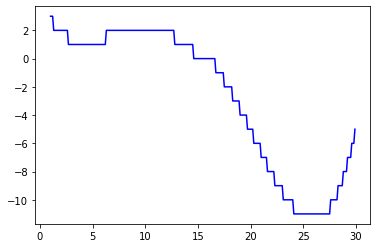

In [120]:
_, ax = plt.subplots()
f2 = np.vectorize(h)
x = np.arange(1, 30, 0.1)
ax.plot(x, f2(x), color="blue", label= "h(x)")

*Минимум функции h(x) с помощью BFGS, взяв в качестве начального приближения x=30:*

In [121]:
min_BFGS_step=minimize(h,30,method='BFGS')

*Поиск минимума функции f(x) с помощью дифференциальной эволюции на промежутке [1, 30]:*

In [124]:
bounds = [(1,30)]
min_DE_step = differential_evolution(h, bounds)

*Запись результата в файл:*

In [131]:
min_step_file = open('C:\\Users\\Sofya_Chirkova\\Desktop\\result_3.txt', 'w')
min_step_file.write(str(min_BFGS_step.fun)+" "+str(min_DE_step.fun))
min_DE_file.close()